# Challenge: Palindrome Integer

The purpose of this challenge is to generate an application for the analysis and design of quantum algorithms. For this case it is to prove that it is a palindrome, being the particular case in integers, for this it is considered that a [palindrome](https://en.wikipedia.org/wiki/Palindrome) integer is an integer x for which reverse(x) = x where reverse(x) is x with its digit reversed. Negative numbers are not palindrome.

To get a clearer idea of this, consider the following two cases:


#### Case 1:

Consider the a integer number in the variable $p_1$, as $12588521$.
    
If you change the reverse order of the number, there is 
    
                           
$$ \text{reverdsed}(p_1) = 12588521 .$$


Rename as $p_1'$, it can be verified that

$$p_1 = p_1',$$

hence $p_1$ is a palindrome.


#### Case 2:

Consider the a integer number in the variable $p_2$, as 12583621.
    
If you change the reverse order of the number, there is 
    
                           
$$ \text{reverdsed}(p_2) = 125638521 .$$


Rename as $p_2'$, it can be verified that

$$p_2 \neq p_2',$$

hence $p_2$ is a palindrome.

### Classical Code

In [15]:
def isPalindrome(A):
        A = [int(x) for x in str(A)]
        len_pa = len(A)
        for i in range(int(len_pa/2)):
            if A[i] != A[len_pa-i-1]:
                return False
        return True


Case 1, with the new proposal

In [16]:
isPalindrome(12588521)

True

In [17]:
isPalindrome(12583621)

False

## Quantum Proposal - Qiskit


For this challenge, the idea of the second proposal will be used and generated in a quantum circuit. And consider the previous inputs of both cases:  12588521, 12583621.

**Now the case 1 must be [1,2,5,8,8,5,2,1];**

**and case 2 must be [1,2,5,8,3,6,2,1]**


For this purpose, different blocks will be considered, such as :

- Generate a vector of positive integers, 
- Inverse of the vector,
- Condition of being equal the number of two vectors.

#### Generate a vector of  positive integers


Encoding to classical to quantum consider the encoding basis, where classical $N$-bit string can be representated as a basis state of a $N$-qubit system. For example, if the classical binary strins  is 101 ,  the quantum state must be $|101\rangle$. 


The case of storing the values in a vector can be represented in a QRAM( some references https://arxiv.org/pdf/0708.1879.pdf, https://github.com/qsharp-community/qram/blob/master/docs/primer.pdf), for this address qubits and information qubits are needed.

#### Example for encoding 

```python
arr = [3, 4, 5, 6]
``` 

Each element **value** needs to be encoded into some qubits and there needs to be some notion of **indexing** present with our encoding. 

While a classical RAM would encode the data into bits, a **qRAM** would encode the data into a quantum state like the following - 

$$ |\Psi \rangle = \frac{|0\rangle V_0|0\rangle^{\otimes n} + |1\rangle V_1|0\rangle^{\otimes n} + |2\rangle V_2|0\rangle^{\otimes n} + |3\rangle V_3|0\rangle^{\otimes n}}{\sqrt{4}}$$

Here we can have two registers - one for the **indexing** and one for the **storage**. 

The first *ket* represents the **index qubits**. The numbers $0,1,2,3$ are indices and written in shorthand decimal format. Actually, the quantum state in the binary format they would be something like - 
    $$ |2\rangle \equiv |10\rangle $$
    
The operator $V_i$ represents the operator which would encode the $i^{th}$ value of the array into the **value qubits**

The second *ket* represents the **value qubits**. These qubits would store the values of the array elements. Note that the number of qubits, $n$ would be - 
    $$ n = \lfloor log_2(m) \rfloor + 1$$
    
where $\lfloor x \rfloor$ represents the [floor function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions) and $m$ is the maximum value available in the array. In the above example, $m$ would be just $6$ and we could use $3$ qubits for the value qubits. Note that value qubits are also encoded in the *binary* format.

Finally, the complete **qRAM** state for the array `[3, 4, 5, 6]` would be - 

$$ |\Psi \rangle = \frac{|00\rangle |011\rangle + |01\rangle |100\rangle + |10\rangle |101\rangle + |11\rangle |110\rangle}{\sqrt{4}}$$

#### Details for Encoding

- Using qiskit to encode the data into a quantum circuit 
- Note that qiskit uses little endian encoding



#### Relevant Imports

In [24]:
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer 
import math, random

qasm_sim = Aer.get_backend('qasm_simulator')

In [3]:
test_vector = [1,2,3,4,4,3,2,1]

## Solution 

- The idea is that if the elements of the number are a palindrome, then the QRAM encoding would exactly be the same for the reversed vector too. 
- Let the array of $n$ elements be called $a$ and its reverse vector $a_v$. If $a$ is a palindrome, $a[i] == a_{v}[i], \forall i$
- Let the $QRAM$ containing the input vector be called $QR$. After this, we simply reverse the operations of the QRAM matrix for the vector $a_v$ to obtain $QR_{rev}$
- Now, we make a circuit with the following $K$ qubit unitary matrix : 

$$ U = H .(QR_{rev}). QR .H $$

- This is applied on the quantum circuit with $K + 1$ qubits with the initial state as - 

$$ |\Psi \rangle = |0 \rangle ^{\otimes K} |0 \rangle$$

where $K = \lceil log_2(N) \rceil + \lfloor log_2(M) \rfloor + 1,\ N = size\ of\ input\_vector, M\ =\ max\ value\ in\ input\ vector$ 

- We now apply $U$ to $|\Psi \rangle$ - 

$$ |\Psi^{'} \rangle = U |\Psi \rangle$$
- At the end, if the input_vector was a palindrome, the first $K$ qubits of the circuit would be in the $|0\rangle ^{\otimes K}$ state as - 

$$ (QR_{rev}). QR = \mathbf{I}$$

- So, we put a $MCX$ gate controlled on the $|0\rangle ^{\otimes K}$ state and store the input in the extra qubit. 

- If palindrome, final state of the circuit is - 
$$ |\Psi^{'} \rangle = |0 \rangle ^{\otimes K} \otimes |1 \rangle $$

- If not palindrome, the final state is : 
$$ |\Psi^{'}  \rangle = |\Phi \rangle \otimes |0 \rangle,\ |\Phi \rangle \neq |0 \rangle ^ {\otimes K} $$

- That's it!

## Functions

### `quantum_value(ctrl, value, name)` 
- This function encodes the `value` at the index `ctrl` into a `QauntumCircuit` object 
- Internally uses the `control` method of the `QuantumCircuit` object to prepare a multi controlled gate
- This is returned as a circuit to the main `qc_vector` caller 

In [4]:
def quantum_value(ctrl, value, name):
    
    # make a circuit 
    circ = QuantumCircuit(len(value), name = name)
    
    # reverse as the least significant bit is the 
    # last one here 
    value = value[::-1]
    
    # encode the value 
    for i in range(len(value)):
        if value[i] == '1':
            circ.x(i)
            
    circ = circ.control(num_ctrl_qubits = len(ctrl), ctrl_state = ctrl)
    
    return circ

### `qc_vector(input_vector)`

- Method to generate the vector in a quantum circuit, the quantum circuit depends of a qubit addres value, can select a binary string representation in the encoding data.

- `input_vector` : Integer value or a list of positive integer values, example 12588521 or [1,2,5,8,8,5,2,1]

- Returns: a quantum circuit that has a set of qubit address and a set of qubit values or a QRAM with the encoded data 


In [5]:

def qc_vector(input_vector):
    n = len(input_vector)
    m = max(input_vector)
    
    size_index = math.ceil(math.log2(n))
    size_value = math.floor(math.log2(m)) + 1
    
    index_register = QuantumRegister(size = size_index, name = "indices")
    value_register = QuantumRegister(size = size_value, name = "values")
    
    qcirc = QuantumCircuit(index_register, value_register)
    qcirc.h(index_register)
    # start encoding of the bits 
    for i in range(n):
        # get the ctrl state 
        
        ctrl_state = bin(i)[2:].zfill(size_index)
        
        value = bin(input_vector[i])[2:].zfill(size_value)
        
        qcirc = qcirc.compose(quantum_value(ctrl_state, value, f'arr_{i}'))
    
    
    return qcirc #return quantum circuit

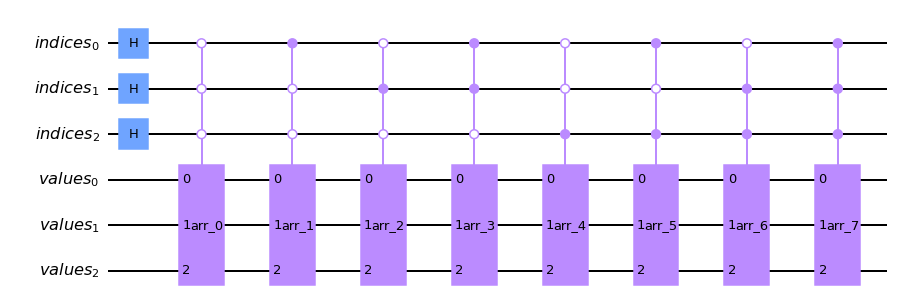

In [6]:
qram = qc_vector(test_vector)
qram.draw('mpl')

### qc_vector_reverse(input_vector) 
- Generates the QRAM for the reversed vector. Note that one caveat has to be that we have to reverse the operations of the circuit to match the control values of the $MCCX$ gates. 
- For an example, take [1,2,2,1] here, the reversed verctor would be the same but if we just used the reversed encoding we would not be able to match the control qubits of the QRAMs.

- `input_vector` : the input vector containing the digits of the number

- Returns : the reversed QRAM matrix for the input vector

In [7]:
def qc_vector_reverse(input_vector):
    return qc_vector(input_vector[::-1]).reverse_ops()#return quantum circuit 
 

In [8]:
reverse_qram = qc_vector_reverse(test_vector)

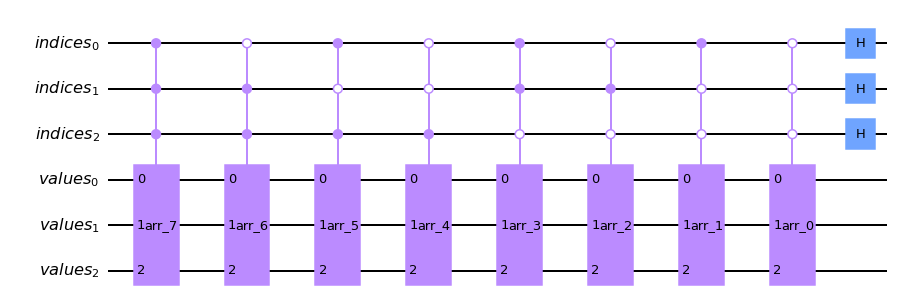

In [9]:
reverse_qram.draw('mpl')

### `quantum_oracle(qubit_number, qram, qram_rev)`
- Makes the $U$ matrix for our algorithm
- `qubit_number` : the total number of qubits in the circuit
- `qram` : qram encoding of the input vector
- `qram_rev` : reversed qram of the reversed input vector

- Returns : `QuantumCircuit` for the oracle 

In [10]:
"""
Method to generate an oracle for a quantum circuit, 
using m+1 qubits, and return a 0 or 1 that neabs different or equals. 

qubit_num: Integer value that representate the values qubits for the qram and 1 extra qubit,
           that is the flag qubit. 

return: a quantum circuit that has a set of qubit values + 1 with the flag qubit. 
"""

def quantum_oracle(qubit_number, qram, qram_rev):
    
    qc = QuantumCircuit(qubit_number, name = 'oracle')
    
    # make the oracle 
    qc.compose(qram, inplace = True)
    qc.barrier()
    qc.compose(qram_rev, inplace = True)
    
    
    return qc #return quantum circuit 

### `quantum_isPalindrome(input_value)
- Takes in an input integer number, and builds and executes a quantum circuit to identify if the number is palindrome or not 
- Returns : 1 if palindrome, 0 if not palindrome

In [18]:
def quantum_isPalindrome(input_value):
    
    input_vector = [int(x) for x in str(input_value)]
    
    # make QR
    qram = qc_vector(input_vector)
    
    # make QR_rev dagger
    reverse_qram = qc_vector_reverse(input_vector)
    
    # define K 
    K = qram.num_qubits 
    
    final_circuit = QuantumCircuit(K + 1,1)
    
    # build oracle 
    oracle = quantum_oracle(K, qram, reverse_qram)
    
    # add oracle
    final_circuit.compose(oracle, inplace = True )
    
    # build and add the mcx gate 
    x_gate = QuantumCircuit(1, name = 'x')
    x_gate.x(0)
    zero_mcx_gate = x_gate.control(num_ctrl_qubits=K, ctrl_state = 0)
    
    # compose the gate
    final_circuit.compose(zero_mcx_gate, inplace = True)
    
    # measurement of flag qubit 
    final_circuit.measure(K,0)
    
    results = execute(final_circuit, backend = qasm_sim, shots = 2**12).result().get_counts()
    
    # all the counts were 1, means all zero state on the first
    # k qubits 
    if '0' not in results.keys():
        return 1 
    else:
        return 0
    

### Checking the quantum algorithm

In [21]:
quantum_isPalindrome(3125885213)

1

In [22]:
quantum_isPalindrome(126776212)

0

### Stress Testing 
- We test our quantum algorithm against the classical one
- The range chosen is arbitray, nevertheless we can see the results are correct for each number in the range

In [25]:
success = 0
failure = 0

for _ in range(100):
    # choosing any random number 
    num = random.randint(1, 1e10)
    
    # quantum result
    result = quantum_isPalindrome(num)
    
    # classical expectation
    if isPalindrome(num):
        expected = 1 
    else:
        expected = 0 
    
    if result == expected:
        success+=1 
    else:
        failure += 1
   
        

In [26]:
print("Success : ",success)
print("Failure : ", failure)

Success :  100
Failure :  0


In [27]:
from qiskit import __qiskit_version__
__qiskit_version__

{'qiskit-terra': '0.22.3', 'qiskit-aer': '0.11.2', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.4', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

## References


[1] Deutsch, David, and Richard Jozsa. "Rapid solution of problems by quantum computation." Proceedings of the Royal Society of London. Series A: Mathematical and Physical Sciences 439.1907 (1992): 553-558., https://www.isical.ac.in/~rcbose/internship/lectures2016/rt08deutschjozsa.pdf

[2] Bernstein, Ethan, and Umesh Vazirani. "Quantum complexity theory." SIAM Journal on computing 26.5 (1997): 1411-1473.https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.655.1186&rep=rep1&type=pdf

[3] Grover, Lov K. , "A fast quantum mechanical algorithm for database search", Proceedings of the 28th Annual ACM Symposium on the Theory of Computing (1996), arXiv:quant-ph/9605043
